In [1]:
## DO NOT MODIFY
%matplotlib inline
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns; sns.set()

# Dataset used in this section: Attendance

In [2]:
Att_data = pd.read_csv('data/DIM_ATTENDANCE.csv', na_values='NULL',sep = ',',
                        dtype={},parse_dates=['businessDate'])

In [3]:
Att_data.head()

,EventID,Location,SiteID,POS_SystemID,businessDate,TotalAttendance,ConcessionAttendance,SuiteAttendance,TotalNumSuites,SuitesInUse,ClubAttendance,MerchandiseAttendance
0,14895690,Site2,6,93,2017-03-30,0,0,0,0,0,0,0
1,14981354,Site2,6,93,2017-04-07,41586,36872,1091,70,66,2468,41586
2,14995359,Site2,6,93,2017-04-08,33731,29966,876,70,49,1833,33731
3,14999428,Site2,6,93,2017-04-09,33727,30281,745,68,48,1617,33727
4,15004567,Site2,6,93,2017-04-10,30244,27128,763,68,48,1172,30244


# Correlation Analysis Between Different Components of Attendance.

In [4]:
Corralation_Matrix = Att_data[['TotalAttendance','ConcessionAttendance','SuiteAttendance','ClubAttendance']].corr()
print(Corralation_Matrix)

                      TotalAttendance  ConcessionAttendance  SuiteAttendance  \
TotalAttendance              1.000000              0.997338         0.871092   
ConcessionAttendance         0.997338              1.000000         0.843754   
SuiteAttendance              0.871092              0.843754         1.000000   
ClubAttendance               0.920549              0.892316         0.915700   

                      ClubAttendance  
TotalAttendance             0.920549  
ConcessionAttendance        0.892316  
SuiteAttendance             0.915700  
ClubAttendance              1.000000  


# Visualization of corralation matrix. 

In [15]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(Corralation_Matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure

# Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio


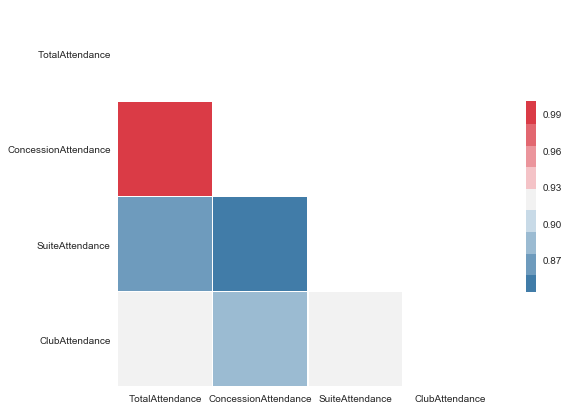

In [16]:
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(Corralation_Matrix, mask=mask, cmap=cmap, center=0.92,
            square=True, linewidths=.3, cbar_kws={"shrink": .5})

# Result:
Any pair of components are highly related ($>0.8$). Total Attendance and Concession Attendance have largest corralation coefficient. And suite attendance is less related to the other three.

# OLS regression analysis on Attendance Data
The total attendance have three components: concession attendance, suite attendance and club attendance. Here we try to find the multiple linear regression formula to describe the linear relationship between them, it could also used for attendance prediction.

In [6]:
Total      = Att_data.TotalAttendance
Concession = Att_data.ConcessionAttendance
Suite      = Att_data.SuiteAttendance
Club       = Att_data.ClubAttendance
result     = sm.ols(formula="Total ~ Concession + Suite + Club", data=Att_data).fit()
print (result.params)

Intercept     1000.873086
Concession       1.006690
Suite            0.701050
Club             0.943030
dtype: float64


In [7]:
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.579e+04
Date:                Mon, 04 Dec 2017   Prob (F-statistic):          2.27e-177
Time:                        18:08:48   Log-Likelihood:                -829.40
No. Observations:                 113   AIC:                             1667.
Df Residuals:                     109   BIC:                             1678.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1000.8731     83.629     11.968      0.0

# Results analysis:
1. Total R-squared of model equal to 0.999 indicate it fit very well and there exist strong multilinearity.
2. The fitted formula is: $$Total = 1000.8731 + 1.0067\times Concession + 0.7010\times Suite + 0.9430\times Club.$$ The P_value is significant for every coefficient, so we reject the null hypothesis and accept the alternatice hypothesis. If we know three variables of formula, we could predict the last one.

Correlation Analysis Between Different Components of Attendance.

In [8]:
print( Att_data[['TotalAttendance','ConcessionAttendance','SuiteAttendance','ClubAttendance']].corr())

                      TotalAttendance  ConcessionAttendance  SuiteAttendance  \
TotalAttendance              1.000000              0.997338         0.871092   
ConcessionAttendance         0.997338              1.000000         0.843754   
SuiteAttendance              0.871092              0.843754         1.000000   
ClubAttendance               0.920549              0.892316         0.915700   

                      ClubAttendance  
TotalAttendance             0.920549  
ConcessionAttendance        0.892316  
SuiteAttendance             0.915700  
ClubAttendance              1.000000  


# Result:
Any pair of components are highly related. Total Attendance and Concession Attendance have largest corralation coefficient. And suite attendance is less related to the other three.

# Question 1: How many business days in each month through the year?

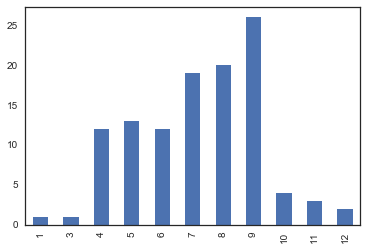

In [20]:
Att_data.businessDate.dt.month.value_counts().sort_index().plot(kind='bar')

# Question 2: What day of the week likely to be the most busy day?

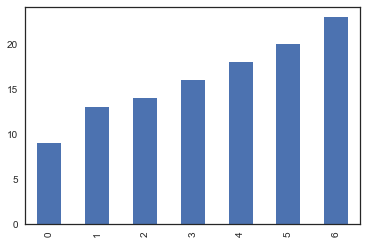

In [21]:
Att_data.businessDate.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

# The number of monthly total attendance during the year.

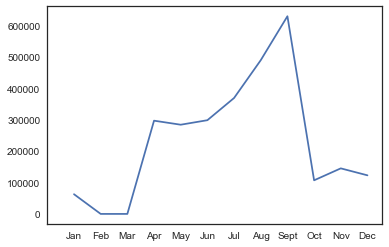

In [22]:
attend_list_monthly = []
month_list = [' ','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
for i in range(1,13):
    attend_list_monthly.append((Att_data[Att_data.businessDate.dt.month == i].TotalAttendance.sum()))
attend_dataframe = pd.DataFrame(data=attend_list_monthly,index=range(1,13))
plt.plot(attend_dataframe)
plt.xticks(range(13), month_list)
plt.show()

# The number of monthly club attendence during the year.

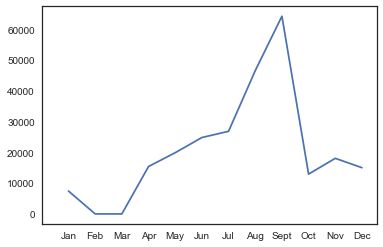

In [23]:
attend_list_monthly = []
month_list = [' ','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
for i in range(1,13):
    attend_list_monthly.append((Att_data[Att_data.businessDate.dt.month == i].ClubAttendance.sum()))
attend_dataframe = pd.DataFrame(data=attend_list_monthly,index=range(1,13))
plt.plot(attend_dataframe)
plt.xticks(range(13), month_list)
plt.show()

Is there any relationship between concession attendance and club attendance?

They are highly related.

# FACT and Attendance

In [24]:
%%time
Att  = pd.read_csv('data/DIM_ATTENDANCE.csv', na_values='NULL',sep = ',',
                        dtype={},parse_dates=['businessDate'],
                        usecols=['TotalAttendance','businessDate'])

FACT = pd.read_csv('data/FACT_Sites_2017.csv', chunksize=5000,
                          parse_dates=['businessDate'],
                          skip_blank_lines=True, error_bad_lines=False,
                          iterator=True, dtype={},usecols=[
 'Site',
 'Location',
 'businessDate',
 'recordID',
 'workstation']
)
popular_work_station = pd.DataFrame()
### Find the most popular workstation (with largest number of TotalAttendance) in every Location.
for chunk in FACT:
    chunk_Att = pd.merge(chunk, Att)
    
    groupby01 = chunk_Att.groupby(['Location', 'workstation']).size().unstack()
    popular_work_station = popular_work_station.add(groupby01, fill_value=0)
    
    work_station = popular_work_station.idxmax(axis=1)
    Total_Att01 = popular_work_station.max(axis=1)
    popular_location_workstation = pd.DataFrame({'MostPopularWorkStation':work_station, 'TotalAttendance':Total_Att01})
    popular_location_workstation = popular_location_workstation.sort_values('TotalAttendance', ascending=False)

CPU times: user 3min 7s, sys: 40.2 s, total: 3min 47s
Wall time: 4min 28s


# 75 percentile of most popular wirkstation in each Location.

In [25]:
quantile01 = popular_location_workstation.TotalAttendance.quantile(0.75)
popular_location_workstation[popular_location_workstation.TotalAttendance > quantile01]

,MostPopularWorkStation,TotalAttendance
Location,,
148 TONY LUKES,PHL_148_2,136797.0
101 CAMPS STK/BR,PHL_101_1,104282.0
129 LIBERTY GRLL,129_5,95652.0
106 S PHILLY MRK,PHL_106_1,94683.0
103 CHICKS & PTS,PHL_103_3,89752.0
123 PHILLY FAVS,123_5,87022.0
423 GRILL PORT,423_1,86307.0
206 S PHILLY MRK,PHL_206_3,84414.0
102 CHCKIE PETES,102_4,83522.0


In [26]:
%%time
FACT = pd.read_csv('data/FACT_Sites_2017.csv', chunksize=5000,
                          parse_dates=['businessDate'],
                          skip_blank_lines=True, error_bad_lines=False,
                          iterator=True, dtype={},usecols=[
 'Site',
 'Location',
 'businessDate',
 'recordID',
 'workstation']
)
busy_day = pd.DataFrame()
### Find the date of the year which has the largest number of TotalAttendance in each Location.
for chunk in FACT:
    chunk_Att = pd.merge(chunk, Att)
    
    groupby02 = chunk_Att.groupby(['Location',chunk_Att.businessDate]).size().unstack()
    busy_day = busy_day.add(groupby02, fill_value=0)
        
    date = busy_day.idxmax(axis=1)
    Total_Att02 = busy_day.max(axis=1)
    popular_location_date = pd.DataFrame({'BusiestDate':date, 'TotalAttendance':Total_Att02})
    popular_location_date = popular_location_date.sort_values('TotalAttendance', ascending=False)

CPU times: user 3min 2s, sys: 29.8 s, total: 3min 32s
Wall time: 3min 56s


In [28]:
quantile02 = popular_location_date.TotalAttendance.quantile(0.75)
popular_location_date[popular_location_date.TotalAttendance > quantile02]

,BusiestDate,TotalAttendance
Location,,
129 LIBERTY GRLL,2016-10-23,42751.0
CW1 WEST MARKET,2016-09-11,30603.0
123 PHILLY FAVS,2016-09-11,28784.0
CB25 E CLUB BAR,2016-10-23,28646.0
102 CHCKIE PETES,2016-09-11,28375.0
236 LIBGR/PHFV,2016-09-25,26816.0
110 PENN PIZZA,2016-09-02,26150.0
104 PHILLY FAVS,2016-08-06,25634.0
121 LIBERTY GRLL,2016-10-23,25332.0


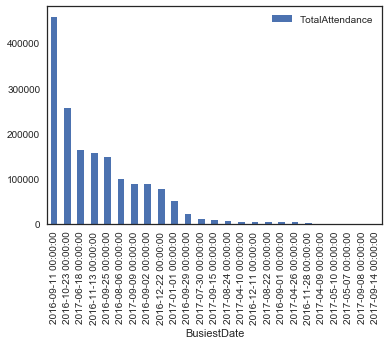

In [29]:
popular_location_date_sorted = popular_location_date.groupby('BusiestDate').sum().sort_values('TotalAttendance', ascending=False)
popular_location_date_sorted.plot(kind='bar')

# Analysis:
Top three TotalAttendance dates are : Sep 11th 2016, Oct 23rd 2016, June 18th 2017.
We could see those are three special days, June 18th 2017 is the Father's Day.

In [30]:
%%time
FACT = pd.read_csv('data/FACT_Sites_2017.csv', chunksize=5000,
                          parse_dates=['businessDate'],
                          skip_blank_lines=True, error_bad_lines=False,
                          iterator=True, dtype={},usecols=[
 'Site',
 'Location',
 'businessDate',
 'recordID',
 'workstation']
)
busy_day_of_week = pd.DataFrame()
### Find the day of week which has the largest number of TotalAttendance in each Location.
for chunk in FACT:
    chunk_Att = pd.merge(chunk, Att)
    
    groupby03 = chunk_Att.groupby(['Location',chunk_Att.businessDate.dt.dayofweek]).size().unstack()
    busy_day_of_week = busy_day_of_week.add(groupby03, fill_value=0)

    weekday = busy_day_of_week.idxmax(axis=1)
    Total_Att03 = busy_day_of_week.max(axis=1)
    popular_location_weekday = pd.DataFrame({'BusiestDate':weekday, 'TotalAttendance':Total_Att03})
    popular_location_weekday = popular_location_weekday.sort_values('TotalAttendance', ascending=False)

CPU times: user 3min 4s, sys: 32.5 s, total: 3min 36s
Wall time: 4min 10s


In [31]:
quantile03 = popular_location_weekday.TotalAttendance.quantile(0.75)
popular_location_weekday[popular_location_weekday.TotalAttendance > quantile03]

,BusiestDate,TotalAttendance
Location,,
129 LIBERTY GRLL,6,238924.0
CB25 E CLUB BAR,6,156851.0
102 CHCKIE PETES,6,156240.0
CW1 WEST MARKET,6,153636.0
123 PHILLY FAVS,6,142858.0
121 LIBERTY GRLL,6,130344.0
CB40 W CLUB BAR,6,127294.0
126 CHCKIE PETES,6,126266.0
138 LIBERTY GRLL,6,125807.0
